In [1]:
import numpy as np
from EM import NiftiManager, Evaluate, EM
from glob import glob
import os
import matplotlib.pyplot as plt

# To allow auto reload to this notebook after modifying any external file imported
%load_ext autoreload
%autoreload 2

In [2]:
NM                      = NiftiManager()
EVAL                    = Evaluate()

**KMeans Init** 

2023-11-11 20:55:12.485 | INFO     | EM:fit:862 - Starting the algorithm. 20 iterations were initialized.
2023-11-11 20:55:13.430 | INFO     | EM:initialize_parameters:622 - Initializing model parameters using 'kmeans'.
2023-11-11 20:55:18.949 | INFO     | EM:fit:890 - Iterations performed: 20. Generating segmentation results.
2023-11-11 20:55:19.384 | INFO     | EM:correct_pred_labels:816 - Finished segmentation. Correcting prediction labels.


CSF DICE:  0.5935510800375339
GM DICE:  0.9076451140784954
WM DICE:  0.8998637662440961


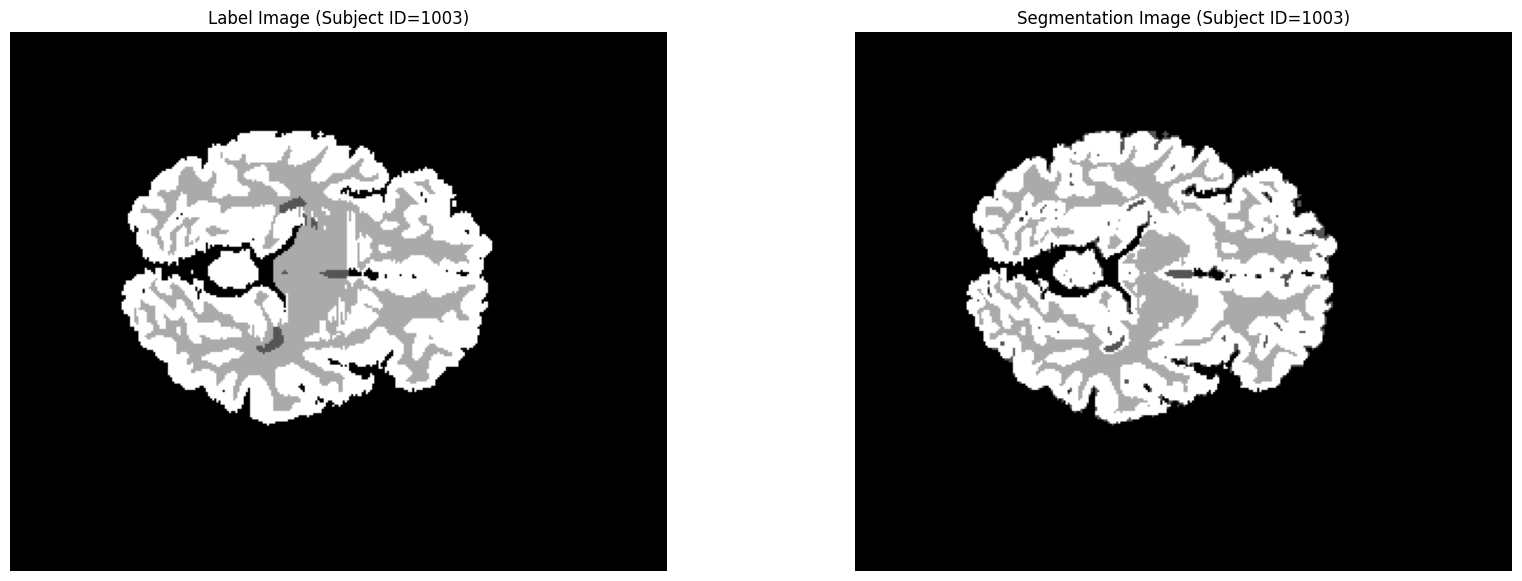

In [3]:
t1_path         = 'test-set/testing-images/1025.nii.gz'
labels_gt_file  = 'test-set/testing-labels/1025_3C.nii.gz'

# initialize EM for multi-modal segmentation
ExpectationMaximization = EM(
    K=3,
    params_init_type = "kmeans",
    modality='single'
)

# perform EM algorithm
segmentation_result = ExpectationMaximization.fit(
    n_iterations = 20,
    labels_gt_file = labels_gt_file,
    t1_path = t1_path,
    correct_labels = True
)


# read the labels gt file
labels_nifti, _ = NM.load_nifti(labels_gt_file)

segmentation_tissue_model_bg  = segmentation_result == 0
segmentation_tissue_model_csf = segmentation_result == 1
segmentation_tissue_model_wm  = segmentation_result == 2
segmentation_tissue_model_gm  = segmentation_result == 3

labels_nifti_CSF              = labels_nifti == 1
labels_nifti_WM               = labels_nifti == 2
labels_nifti_GM               = labels_nifti == 3

dice_csf    = EVAL.calc_dice_coefficient(labels_nifti_CSF, segmentation_tissue_model_csf)
dice_wm     = EVAL.calc_dice_coefficient(labels_nifti_WM, segmentation_tissue_model_wm)
dice_gm     = EVAL.calc_dice_coefficient(labels_nifti_GM, segmentation_tissue_model_gm)

print("CSF DICE: ", dice_csf)
print("GM DICE: ", dice_gm)
print("WM DICE: ", dice_wm)

NM.show_label_seg_nifti(labels_nifti, segmentation_result, 1003, slice=128)

**Tissue Models Init** 

2023-11-14 18:00:28.560 | INFO     | EM:fit:963 - Starting the algorithm. 20 iterations were initialized.
2023-11-14 18:00:29.310 | INFO     | EM:initialize_parameters:716 - Initializing model parameters using 'tissue_models'.
2023-11-14 18:00:38.046 | INFO     | EM:fit:995 - Iterations performed: 17. Generating segmentation results.
2023-11-14 18:00:38.472 | INFO     | EM:correct_pred_labels:917 - Finished segmentation. Correcting prediction labels.


CSF DICE:  0.8285704813684501
GM DICE:  0.9349867625070252
WM DICE:  0.8877938540606878


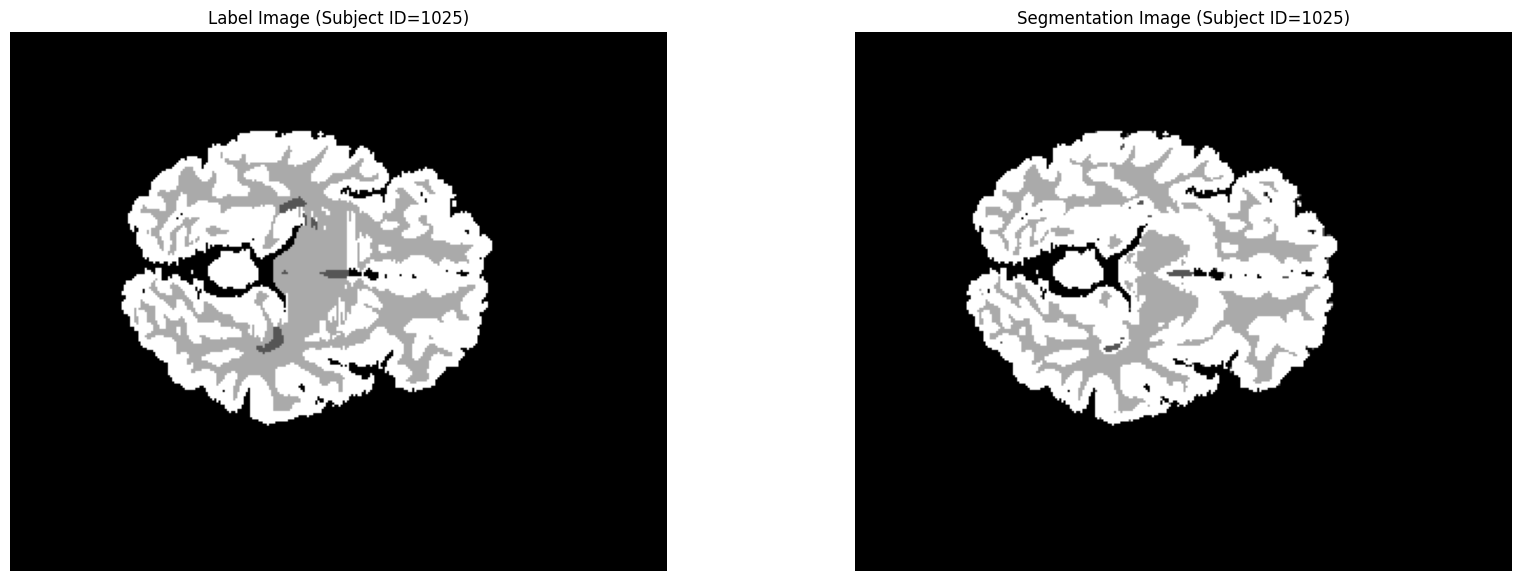

In [53]:
t1_path         = 'test-set/testing-images/1025.nii.gz'
labels_gt_file  = 'test-set/testing-labels/1025_3C.nii.gz'

# initialize EM for multi-modal segmentation
ExpectationMaximization = EM(
    K=3,
    params_init_type = "tissue_models",
    modality='single'
)

# perform EM algorithm
segmentation_result = ExpectationMaximization.fit(
    n_iterations = 20,
    labels_gt_file = labels_gt_file,
    t1_path = t1_path,
    correct_labels = True,
    tissue_model_csv_dir = 'atlas_outputs/tissue_model_probability_data.csv'
)

# read the labels gt file
labels_nifti, _ = NM.load_nifti(labels_gt_file)

segmentation_tissue_model_bg  = segmentation_result == 0
segmentation_tissue_model_csf = segmentation_result == 1
segmentation_tissue_model_wm  = segmentation_result == 2
segmentation_tissue_model_gm  = segmentation_result == 3

labels_nifti_CSF              = labels_nifti == 1
labels_nifti_WM               = labels_nifti == 2
labels_nifti_GM               = labels_nifti == 3

dice_csf    = EVAL.calc_dice_coefficient(labels_nifti_CSF, segmentation_tissue_model_csf)
dice_wm     = EVAL.calc_dice_coefficient(labels_nifti_WM, segmentation_tissue_model_wm)
dice_gm     = EVAL.calc_dice_coefficient(labels_nifti_GM, segmentation_tissue_model_gm)

print("CSF DICE: ", dice_csf)
print("GM DICE: ", dice_gm)
print("WM DICE: ", dice_wm)

NM.show_label_seg_nifti(labels_nifti, segmentation_result, 1025, slice=128)
# NM.show_nifti(segmentation_result, 1025, slice=128)

**Atlas Init**

2023-11-11 20:56:20.235 | INFO     | EM:fit:862 - Starting the algorithm. 20 iterations were initialized.
2023-11-11 20:56:21.146 | INFO     | EM:initialize_parameters:622 - Initializing model parameters using 'atlas'.
2023-11-11 20:56:23.849 | INFO     | EM:fit:890 - Iterations performed: 1. Generating segmentation results.
2023-11-11 20:56:24.286 | INFO     | EM:correct_pred_labels:816 - Finished segmentation. Correcting prediction labels.


CSF DICE:  0.8049813574761869
GM DICE:  0.9243151133215841
WM DICE:  0.893537142375669


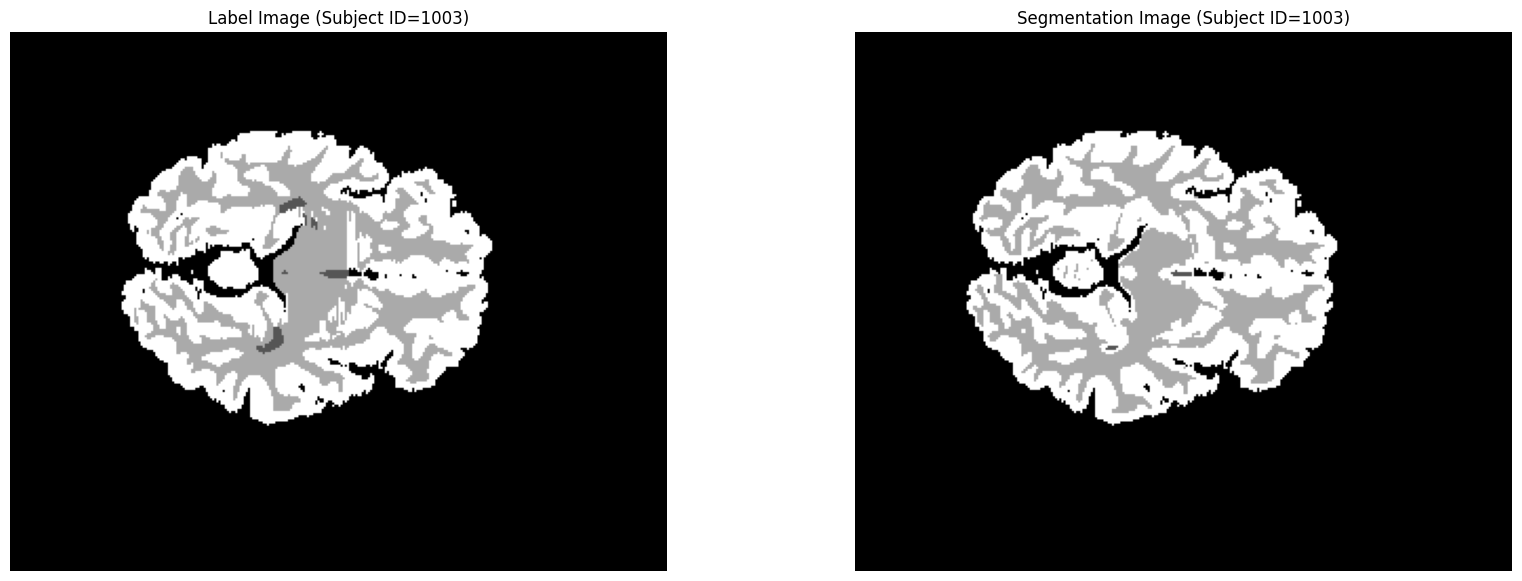

In [6]:
t1_path         = 'test-set/testing-images/1025.nii.gz'
labels_gt_file  = 'test-set/testing-labels/1025_3C.nii.gz'

# initialize EM for multi-modal segmentation
ExpectationMaximization = EM(
    K=3,
    params_init_type = "atlas",
    modality='single'
)

# perform EM algorithm
segmentation_result = ExpectationMaximization.fit(
    n_iterations = 20,
    labels_gt_file = labels_gt_file,
    t1_path = t1_path,
    correct_labels = True,
    atlas_csf = NM.load_nifti('output/labels/output_1025/atlas_outputs/mean_csf/result.nii')[0],
    atlas_wm  = NM.load_nifti('output/labels/output_1025/atlas_outputs/mean_wm/result.nii')[0],
    atlas_gm  = NM.load_nifti('output/labels/output_1025/atlas_outputs/mean_gm/result.nii')[0]
)

# read the labels gt file
labels_nifti, _ = NM.load_nifti(labels_gt_file)

segmentation_tissue_model_bg  = segmentation_result == 0
segmentation_tissue_model_csf = segmentation_result == 1
segmentation_tissue_model_wm  = segmentation_result == 2
segmentation_tissue_model_gm  = segmentation_result == 3

labels_nifti_CSF              = labels_nifti == 1
labels_nifti_WM               = labels_nifti == 2
labels_nifti_GM               = labels_nifti == 3

dice_csf    = EVAL.calc_dice_coefficient(labels_nifti_CSF, segmentation_tissue_model_csf)
dice_wm     = EVAL.calc_dice_coefficient(labels_nifti_WM, segmentation_tissue_model_wm)
dice_gm     = EVAL.calc_dice_coefficient(labels_nifti_GM, segmentation_tissue_model_gm)

print("CSF DICE: ", dice_csf)
print("GM DICE: ", dice_gm)
print("WM DICE: ", dice_wm)

NM.show_label_seg_nifti(labels_nifti, segmentation_result, 1003, slice=128)

**Initializing using both tissue models and atlases**

2023-11-15 16:50:16.291 | INFO     | EM:fit:964 - Starting the algorithm. 20 iterations were initialized.
2023-11-15 16:50:17.421 | INFO     | EM:initialize_parameters:717 - Initializing model parameters using 'tissue_models_atlas'.
2023-11-15 16:50:27.527 | INFO     | EM:fit:996 - Iterations performed: 20. Generating segmentation results.
2023-11-15 16:50:28.018 | INFO     | EM:correct_pred_labels:918 - Finished segmentation. Correcting prediction labels.


CSF DICE:  0.8245183089248029
GM DICE:  0.9309013553503099
WM DICE:  0.9040001285845719


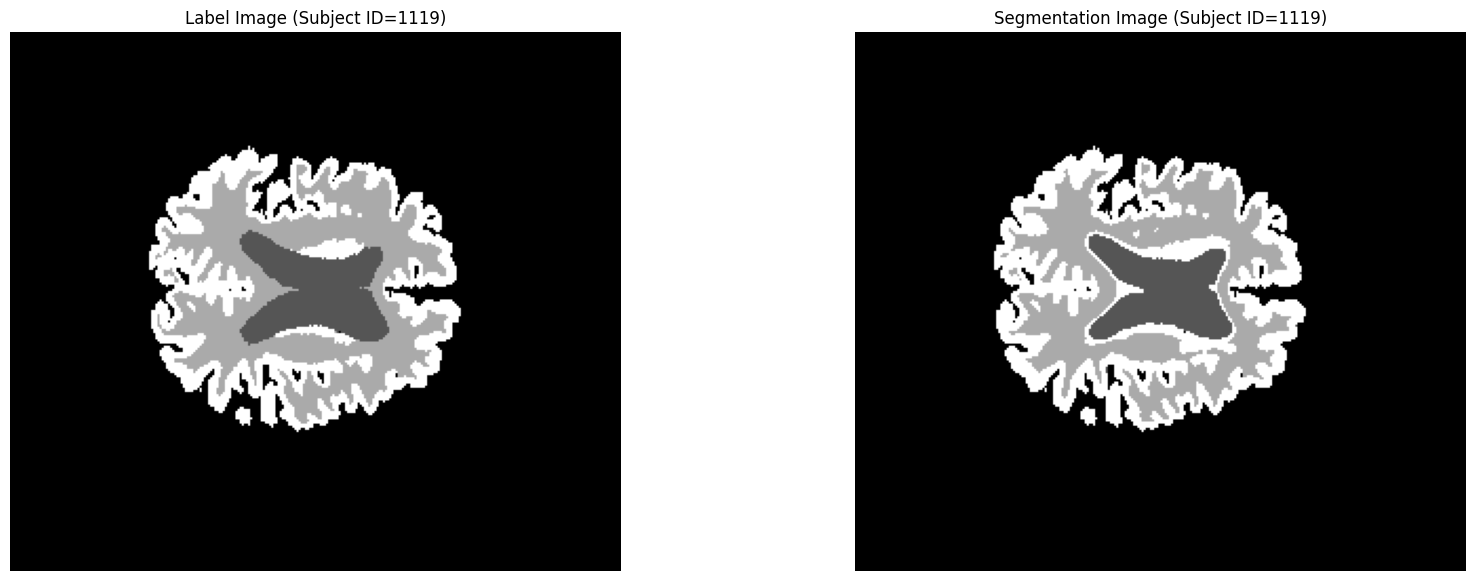

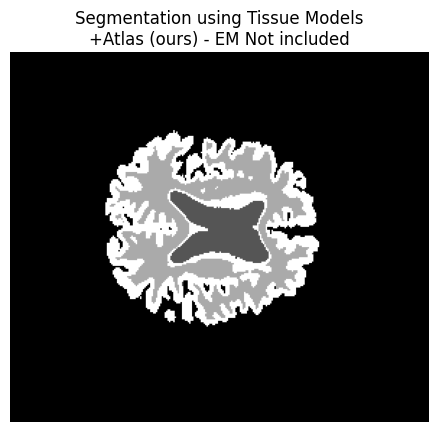

In [21]:
t1_path         = 'test-set/testing-images/1119.nii.gz'
labels_gt_file  = 'test-set/testing-labels/1119_3C.nii.gz'

# initialize EM for multi-modal segmentation
ExpectationMaximization = EM(
    K=3,
    params_init_type = "tissue_models_atlas",
    modality='single'
)

# perform EM algorithm
segmentation_result = ExpectationMaximization.fit(
    n_iterations = 20,
    labels_gt_file = labels_gt_file,
    t1_path = t1_path,
    correct_labels = True,
    tissue_model_csv_dir = 'atlas_outputs/tissue_model_probability_data.csv',
    atlas_csf = NM.load_nifti('output/labels/output_1119/atlas_outputs/mean_csf/result.nii')[0],
    atlas_wm  = NM.load_nifti('output/labels/output_1119/atlas_outputs/mean_wm/result.nii')[0],
    atlas_gm  = NM.load_nifti('output/labels/output_1119/atlas_outputs/mean_gm/result.nii')[0]
)

# read the labels gt file
labels_nifti, _ = NM.load_nifti(labels_gt_file)

segmentation_tissue_model_bg  = segmentation_result == 0
segmentation_tissue_model_csf = segmentation_result == 1
segmentation_tissue_model_wm  = segmentation_result == 2
segmentation_tissue_model_gm  = segmentation_result == 3

labels_nifti_CSF              = labels_nifti == 1
labels_nifti_WM               = labels_nifti == 2
labels_nifti_GM               = labels_nifti == 3

dice_csf    = EVAL.calc_dice_coefficient(labels_nifti_CSF, segmentation_tissue_model_csf)
dice_wm     = EVAL.calc_dice_coefficient(labels_nifti_WM, segmentation_tissue_model_wm)
dice_gm     = EVAL.calc_dice_coefficient(labels_nifti_GM, segmentation_tissue_model_gm)

print("CSF DICE: ", dice_csf)
print("GM DICE: ", dice_gm)
print("WM DICE: ", dice_wm)

NM.show_label_seg_nifti(labels_nifti, segmentation_result, 1119, slice=148)
NM.show_nifti(segmentation_result, title='Segmentation using Tissue Models\n+Atlas (ours) - EM Not included', slice=148)

**Including atlas using a posteriori method**

2023-11-15 16:50:32.436 | INFO     | EM:fit:964 - Starting the algorithm. 20 iterations were initialized.
2023-11-15 16:50:33.604 | INFO     | EM:initialize_parameters:717 - Initializing model parameters using 'tissue_models_atlas'.
2023-11-15 16:50:43.816 | INFO     | EM:fit:993 - Including atlas probabilities into EM result using posteriori method.
2023-11-15 16:50:43.822 | INFO     | EM:fit:996 - Iterations performed: 20. Generating segmentation results.
2023-11-15 16:50:44.295 | INFO     | EM:correct_pred_labels:918 - Finished segmentation. Correcting prediction labels.


CSF DICE:  0.7082678261806373
GM DICE:  0.9262438397003278
WM DICE:  0.911172063770367


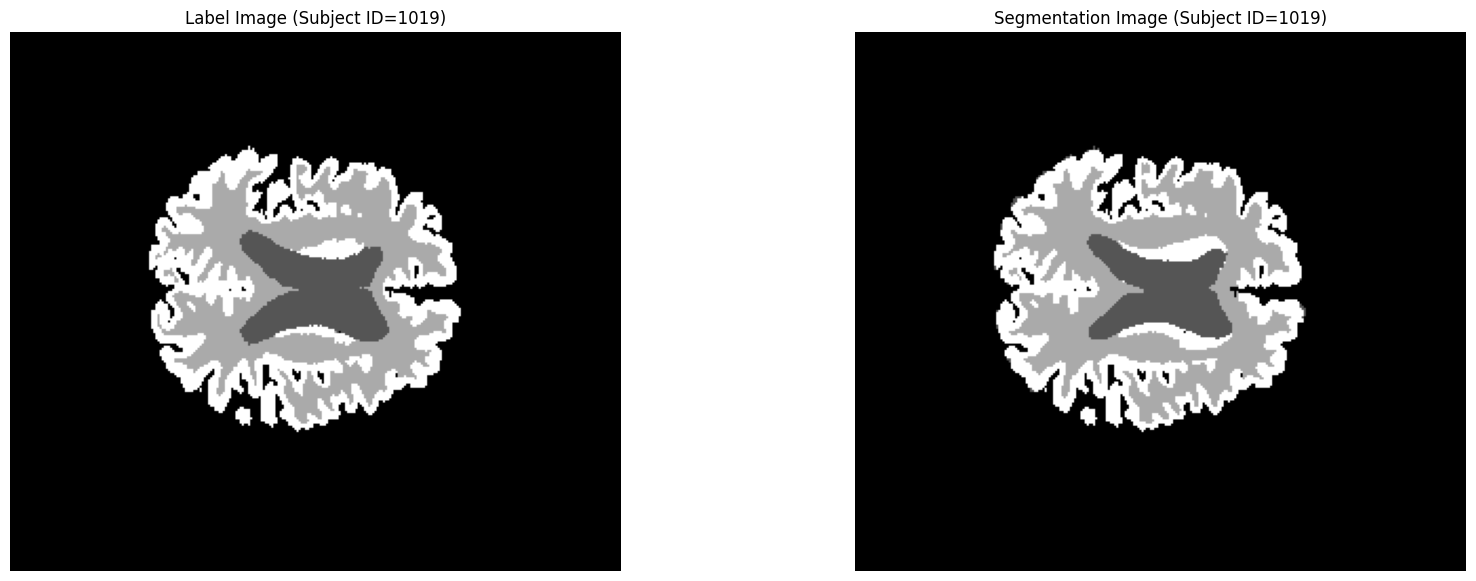

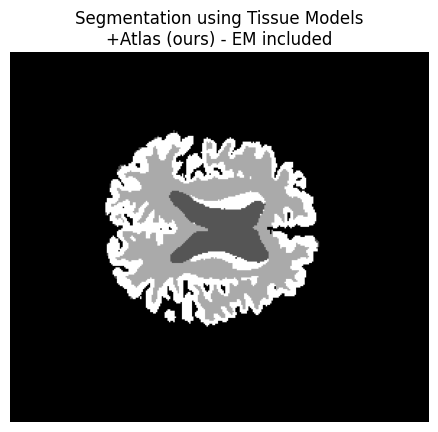

In [22]:
t1_path         = 'test-set/testing-images/1119.nii.gz'
labels_gt_file  = 'test-set/testing-labels/1119_3C.nii.gz'

# initialize EM for multi-modal segmentation
ExpectationMaximization = EM(
    K=3,
    params_init_type = "tissue_models_atlas",
    modality='single'
)

# perform EM algorithm
segmentation_result = ExpectationMaximization.fit(
    n_iterations = 20,
    labels_gt_file = labels_gt_file,
    t1_path = t1_path,
    correct_labels = True,
    tissue_model_csv_dir = 'atlas_outputs/tissue_model_probability_data.csv',
    atlas_csf = NM.load_nifti('output/labels/output_1119/atlas_outputs/mean_csf/result.nii')[0],
    atlas_wm  = NM.load_nifti('output/labels/output_1119/atlas_outputs/mean_wm/result.nii')[0],
    atlas_gm  = NM.load_nifti('output/labels/output_1119/atlas_outputs/mean_gm/result.nii')[0],
    include_atlas = 'posteriori'
)

# read the labels gt file
labels_nifti, _ = NM.load_nifti(labels_gt_file)

segmentation_tissue_model_bg  = segmentation_result == 0
segmentation_tissue_model_csf = segmentation_result == 1
segmentation_tissue_model_wm  = segmentation_result == 2
segmentation_tissue_model_gm  = segmentation_result == 3

labels_nifti_CSF              = labels_nifti == 1
labels_nifti_WM               = labels_nifti == 2
labels_nifti_GM               = labels_nifti == 3

dice_csf    = EVAL.calc_dice_coefficient(labels_nifti_CSF, segmentation_tissue_model_csf)
dice_wm     = EVAL.calc_dice_coefficient(labels_nifti_WM, segmentation_tissue_model_wm)
dice_gm     = EVAL.calc_dice_coefficient(labels_nifti_GM, segmentation_tissue_model_gm)

print("CSF DICE: ", dice_csf)
print("GM DICE: ", dice_gm)
print("WM DICE: ", dice_wm)

NM.show_label_seg_nifti(labels_nifti, segmentation_result, 1019, slice=148)
NM.show_nifti(segmentation_result, title='Segmentation using Tissue Models\n+Atlas (ours) - EM included', slice=148)

In [3]:
test_path = 'test-set/testing-images'
test_labels_path = 'test-set/testing-labels'
test_masks_path = 'test-set/testing-mask'

test_volumes = sorted(glob(os.path.join(test_path, "*.nii.gz"), recursive=True))
test_labels = sorted(glob(os.path.join(test_labels_path, "*.nii.gz"), recursive=True))
test_masks = sorted(glob(os.path.join(test_masks_path, "*.nii.gz"), recursive=True))

In [24]:
atlas_registered_path = 'output/images/'
atlas_registered_volumes = sorted(glob(os.path.join(atlas_registered_path, "***", 'mean_intensity', "*.nii"), recursive=True))
mni_atlas_registered_volumes = sorted(glob(os.path.join(atlas_registered_path, "***", 'template', "*.nii"), recursive=True))

In [44]:
# atlas_labels_registered_path = 'output/labels/'

# atlas_registered_csf_labels = sorted(glob(os.path.join(atlas_labels_registered_path, "***", 'atlas_outputs', "mean_csf/*.nii"), recursive=True))
# atlas_registered_wm_labels = sorted(glob(os.path.join(atlas_labels_registered_path, "***", 'atlas_outputs', "mean_wm/*.nii"), recursive=True))
# atlas_registered_gm_labels = sorted(glob(os.path.join(atlas_labels_registered_path, "***", 'atlas_outputs', "mean_gm/*.nii"), recursive=True))

# mni_atlas_registered_csf_labels = sorted(glob(os.path.join(atlas_labels_registered_path, "***", 'MNITemplateAtlas', "mean_csf/*.nii"), recursive=True))
# mni_atlas_registered_wm_labels = sorted(glob(os.path.join(atlas_labels_registered_path, "***", 'MNITemplateAtlas', "mean_wm/*.nii"), recursive=True))
# mni_atlas_registered_gm_labels = sorted(glob(os.path.join(atlas_labels_registered_path, "***", 'MNITemplateAtlas', "mean_gm/*.nii"), recursive=True))

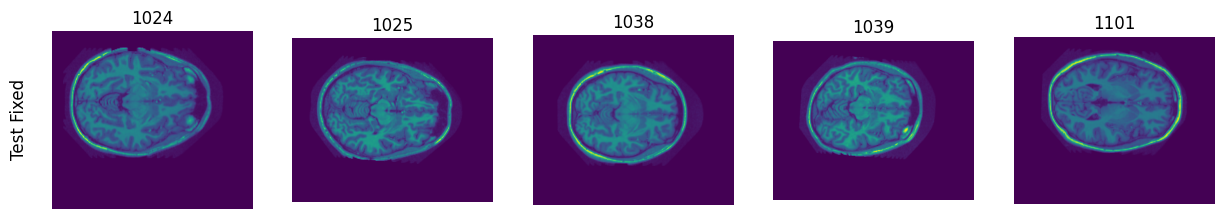

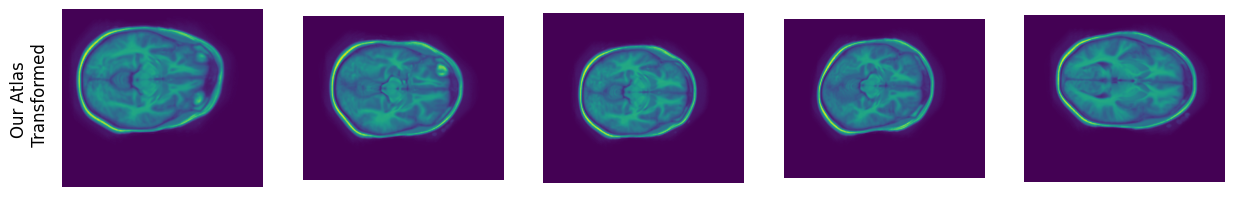

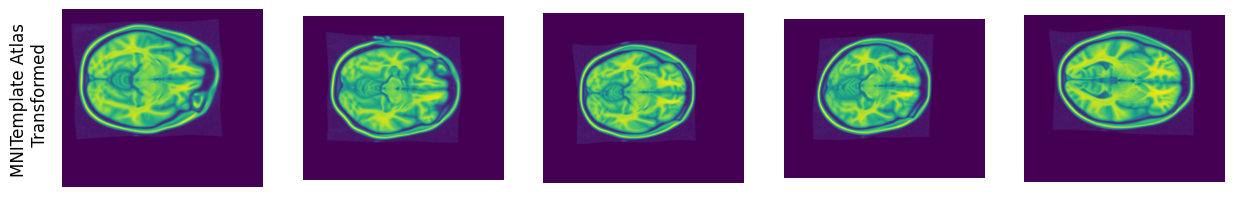

In [46]:
fig, axes = plt.subplots(1, 5, figsize=(15, 3), sharey=True)

# Create a common x-axis label for the entire row of subplots
fig.text(0.11, 0.5, 'Test Fixed\n', va='center', ha='center', rotation='vertical', fontsize=12)

for idx, value in enumerate(test_volumes[6:11]):
    filename     = value.replace('\\', '/').split('/')[-1].split('.')[0]
    labels_nifti = NM.load_nifti(value)[0]

    axes[idx].imshow(labels_nifti[:,:,125])
    axes[idx].set_title(f'{filename}')
    axes[idx].axis('off')  # Turn off axis labels


fig, axes = plt.subplots(1, 5, figsize=(15, 3), sharey=True)
fig.text(0.11, 0.5, 'Our Atlas \n Transformed\n', va='center', ha='center', rotation='vertical', fontsize=12)

for idx, value in enumerate(atlas_registered_volumes[6:11]):
    filename     = test_volumes[idx].replace('\\', '/').split('/')[-1].split('.')[0]
    labels_nifti = NM.load_nifti(value)[0]

    axes[idx].imshow(labels_nifti[:,:,125])
    # axes[idx].set_title(f'{filename}')
    axes[idx].axis('off')  # Turn off axis labels


fig, axes = plt.subplots(1, 5, figsize=(15, 3), sharey=True)
fig.text(0.11, 0.5, 'MNITemplate Atlas \n Transformed\n', va='center', ha='center', rotation='vertical', fontsize=12)

for idx, value in enumerate(mni_atlas_registered_volumes[6:11]):
    filename     = test_volumes[idx].replace('\\', '/').split('/')[-1].split('.')[0]
    labels_nifti = NM.load_nifti(value)[0]

    axes[idx].imshow(labels_nifti[:,:,125])
    # axes[idx].set_title(f'{filename}')
    axes[idx].axis('off')  # Turn off axis labels


Displaying all segmentation results using the best experiment

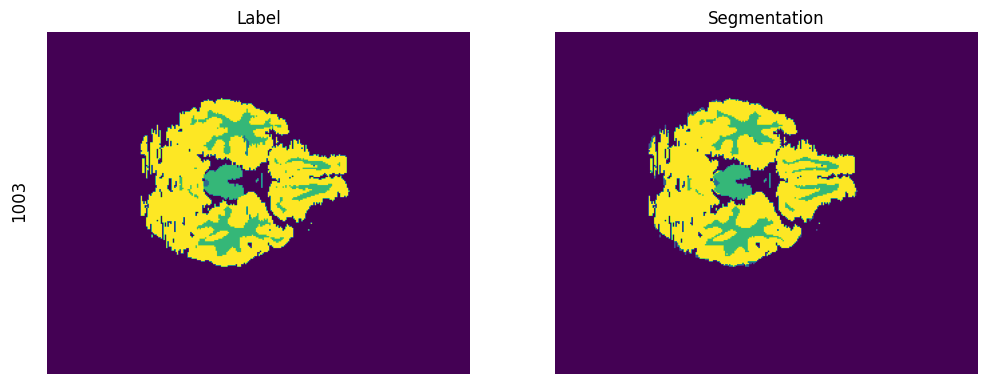

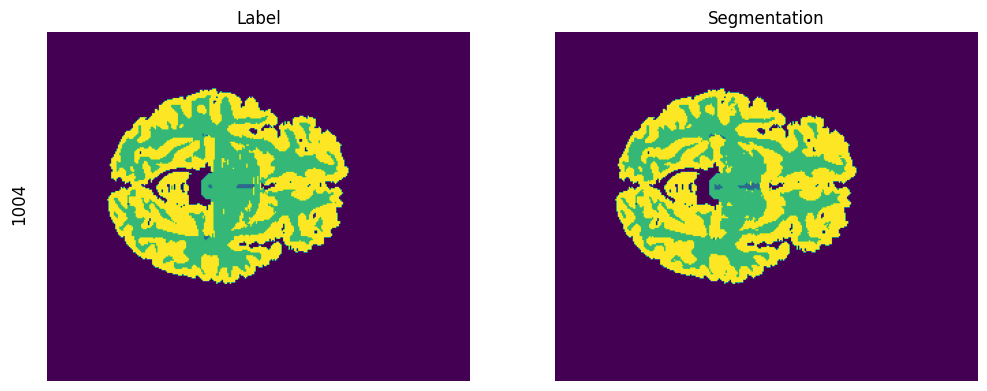

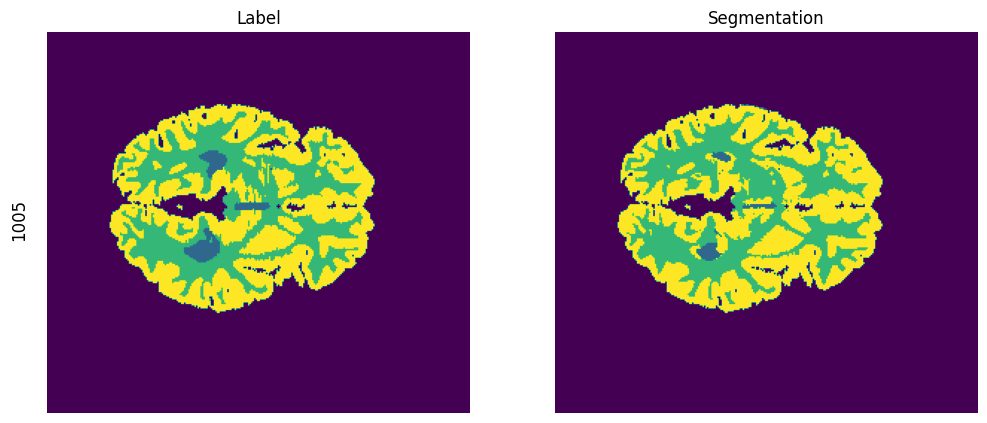

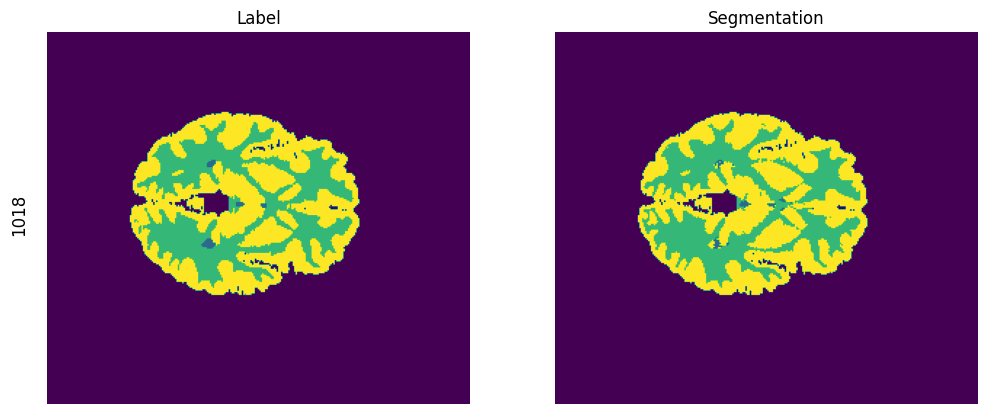

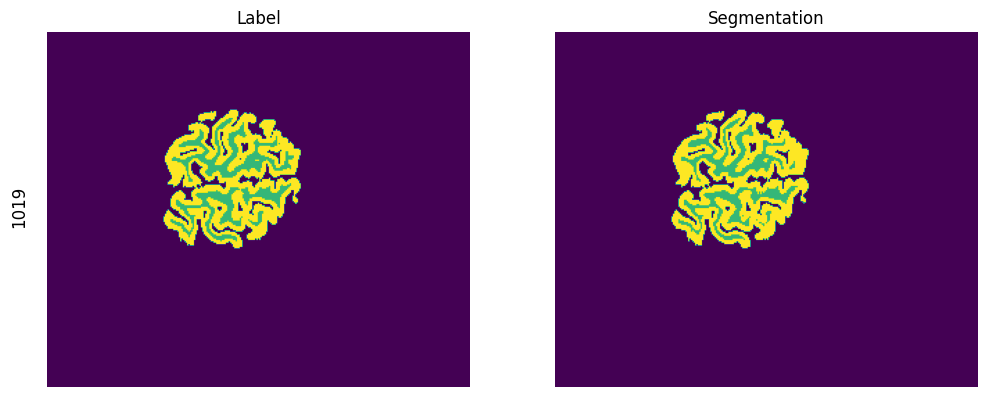

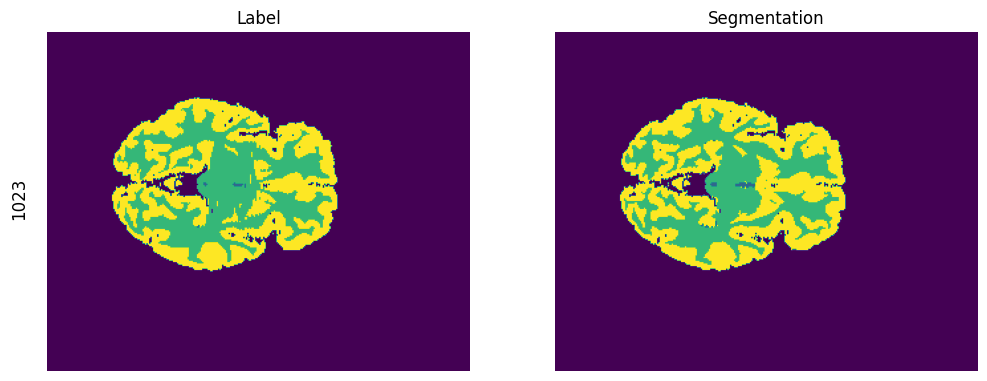

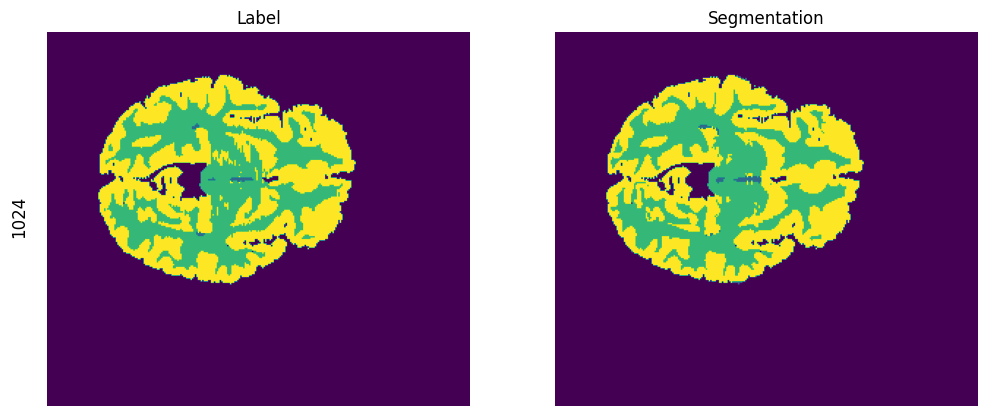

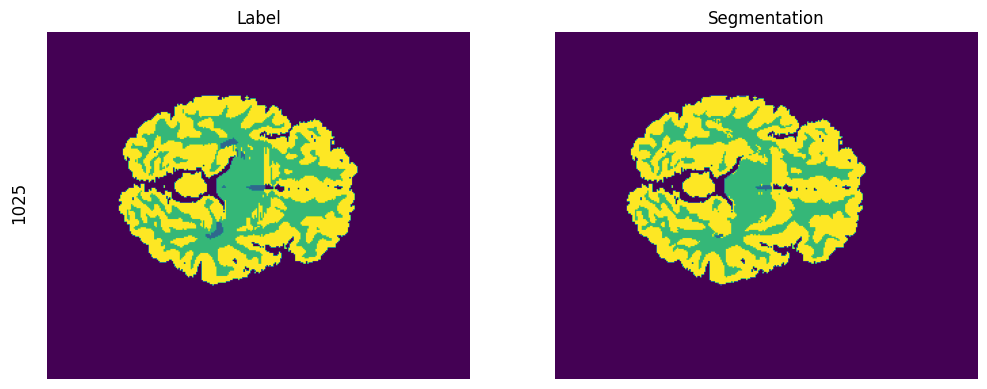

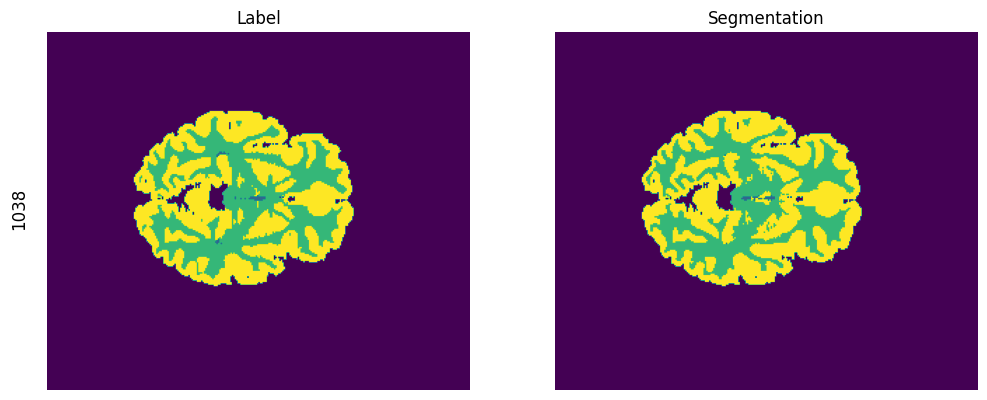

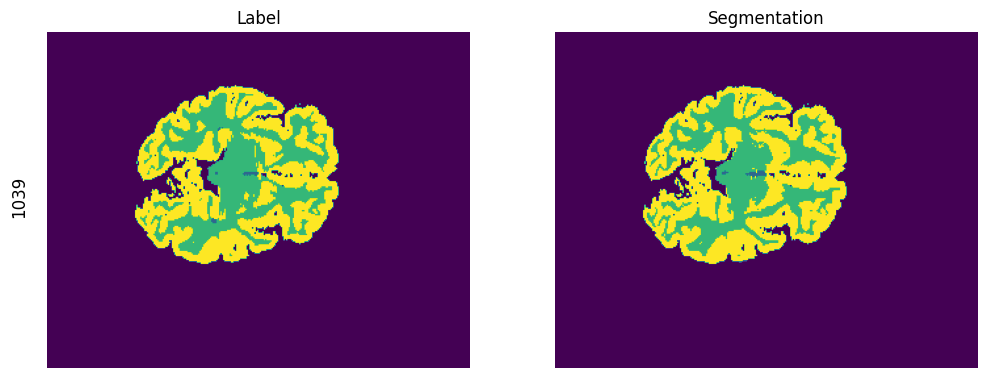

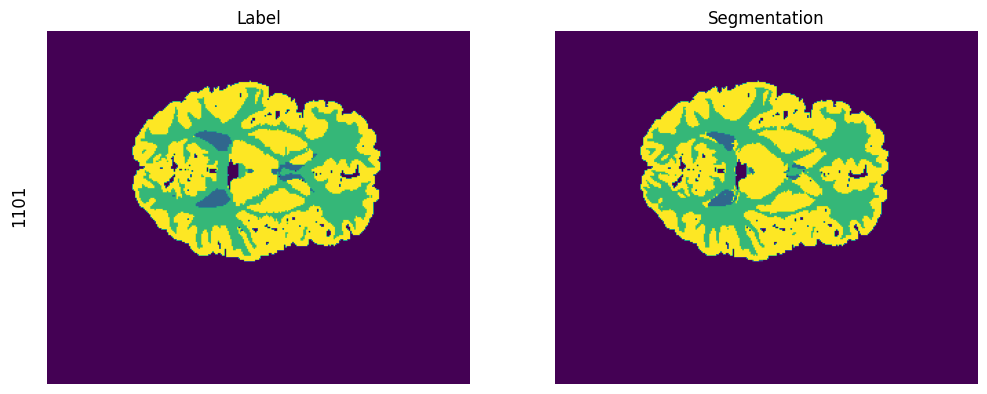

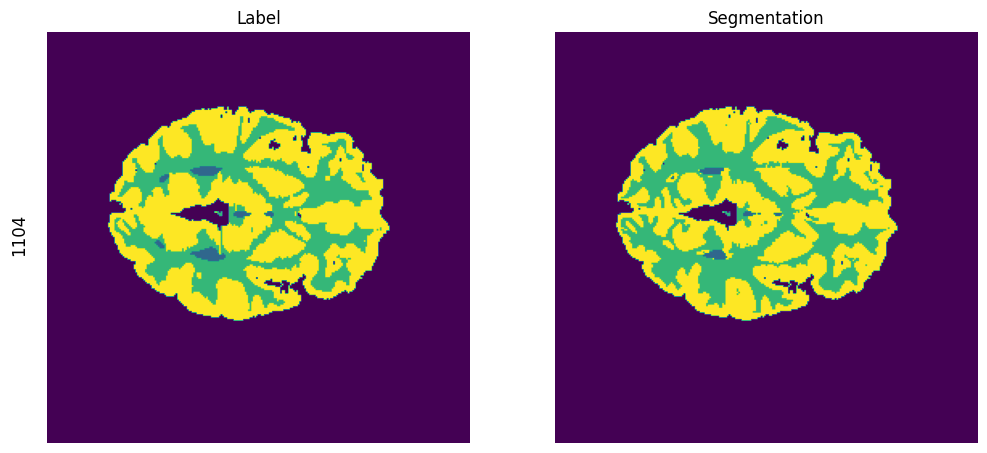

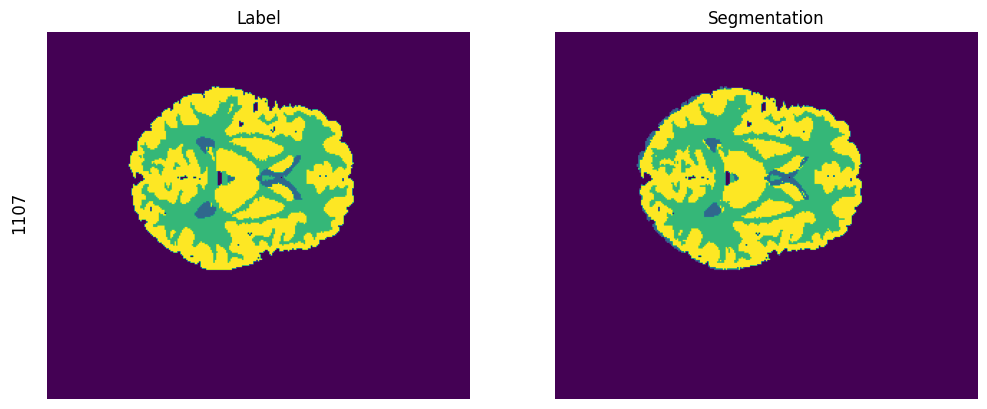

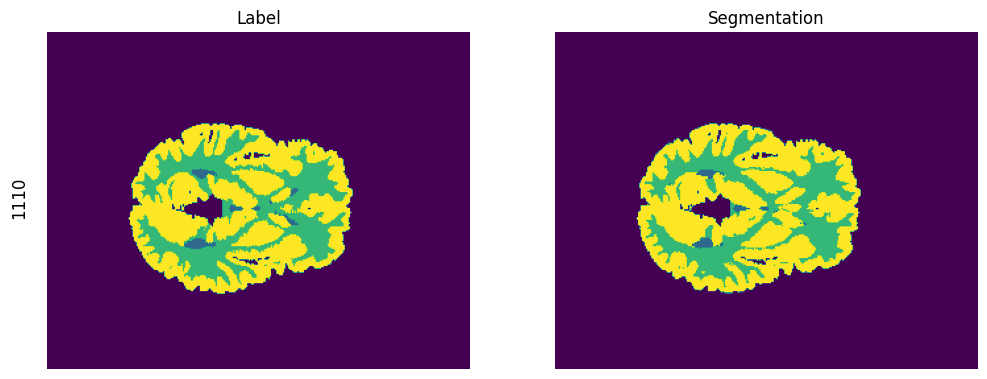

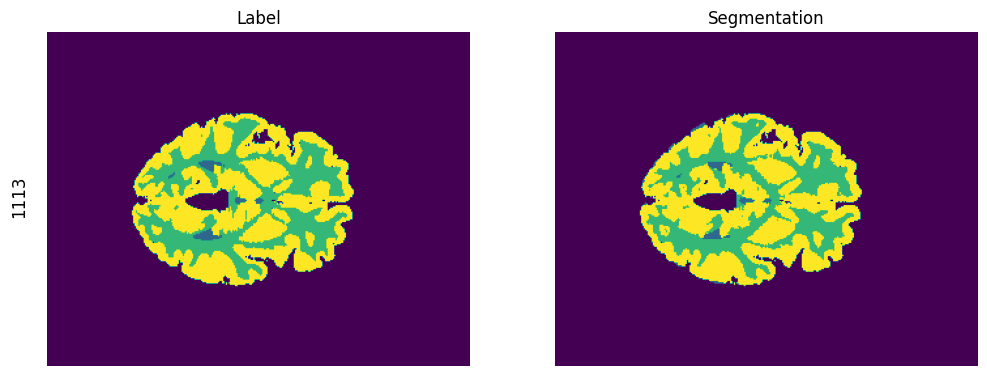

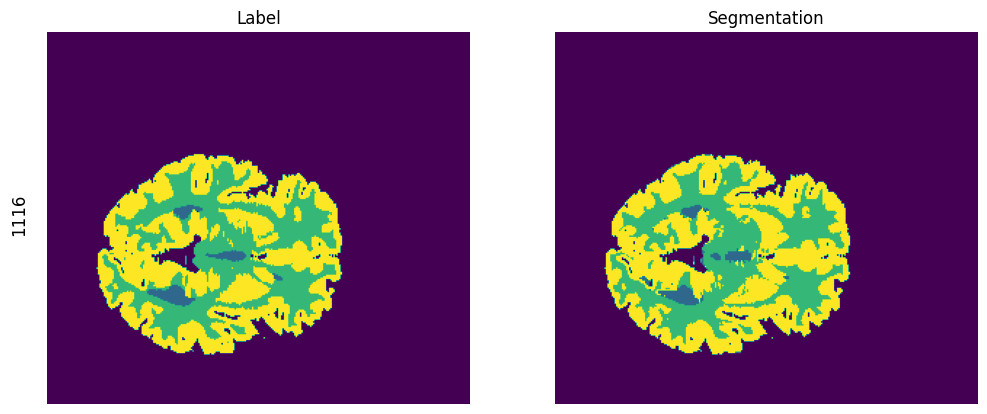

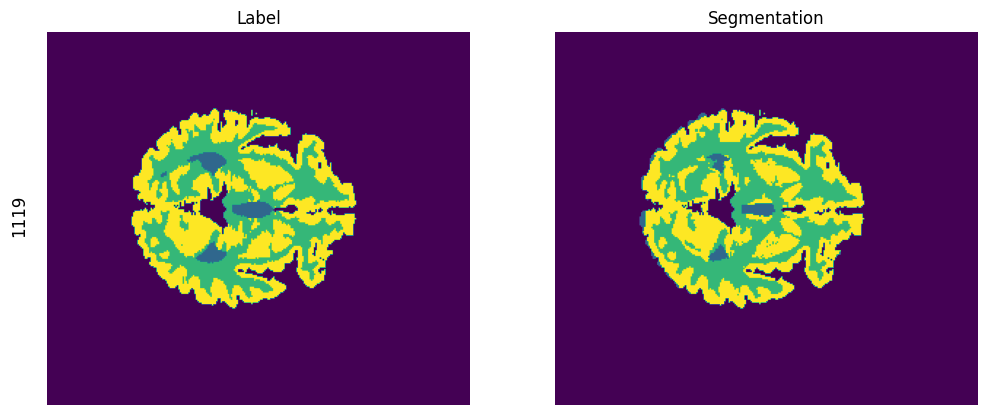

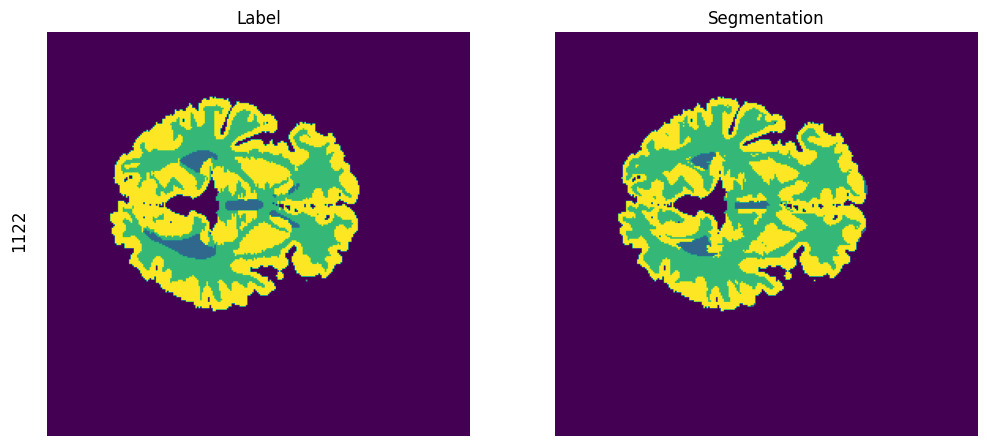

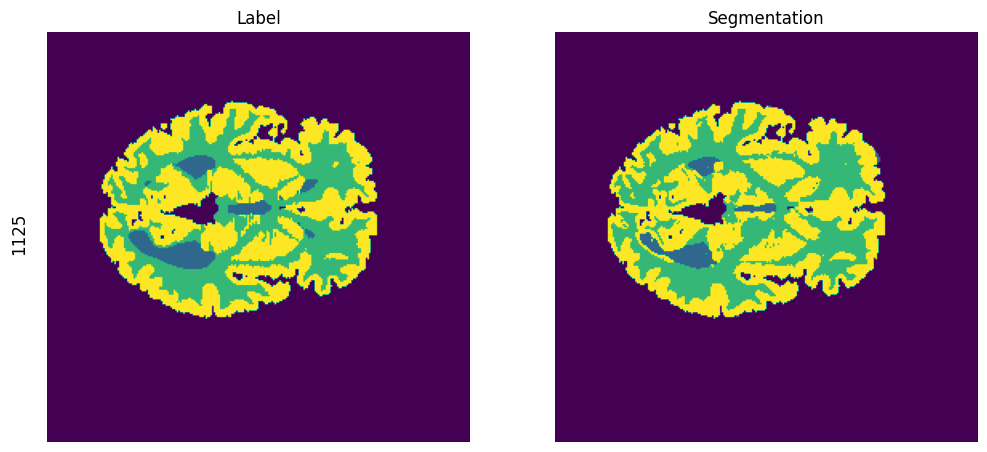

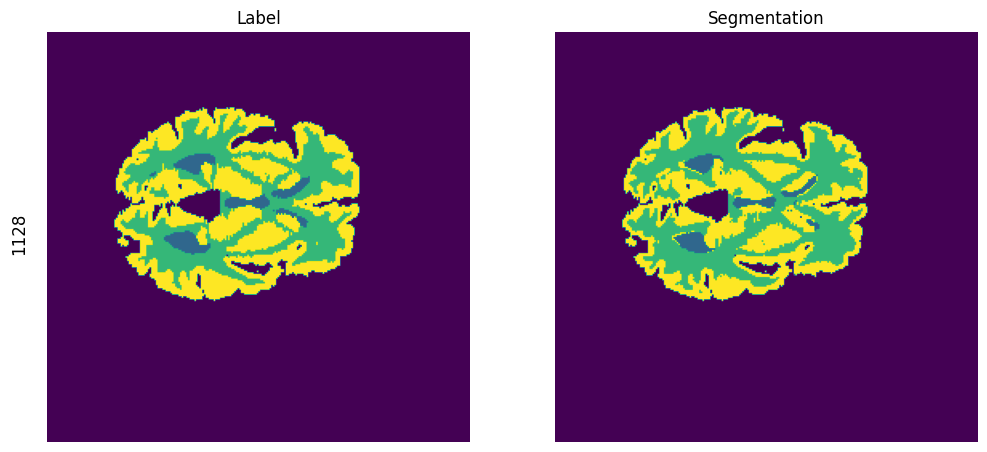

In [24]:
##################################################################
########### INIT=tissue_models_atlas, SINGLE MODALITY ############
############ ATLAS PROBABILITIES INCLUDED ########################
##################################################################
ExpectationMaximization = EM(
    K=3,
    params_init_type = "tissue_models_atlas",
    modality='single',
    verbose=False
)

WM_DICE  = []
GM_DICE  = []
CSF_DICE = []

for test_volume, test_label, test_mask in zip(test_volumes, test_labels, test_masks):
    file_name = test_volume.replace('\\','/').split('/')[-1].split('.')[0]

    # Fit and predict
    segmentation_result = ExpectationMaximization.fit(
        n_iterations = 20,
        labels_gt_file = test_label,
        t1_path = test_volume,
        correct_labels = True,
        tissue_model_csv_dir = 'atlas_outputs/tissue_model_probability_data.csv',
        atlas_csf = NM.load_nifti(f'output/labels/output_{file_name}/atlas_outputs/mean_csf/result.nii')[0],
        atlas_wm  = NM.load_nifti(f'output/labels/output_{file_name}/atlas_outputs/mean_wm/result.nii')[0],
        atlas_gm  = NM.load_nifti(f'output/labels/output_{file_name}/atlas_outputs/mean_gm/result.nii')[0],
        include_atlas = 'posteriori'
    )

    labels_nifti = NM.load_nifti(test_label)[0]

    # create the figures
    fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

    # Create a common x-axis label for the entire row of subplots
    fig.text(0.11, 0.5, f'{file_name}\n', va='center', ha='center', rotation='vertical', fontsize=12)

    axes[0].imshow(labels_nifti[:,:,128])
    axes[0].set_title('Label')
    axes[0].axis('off')  # Turn off axis labels

    axes[1].imshow(segmentation_result[:,:,128])
    axes[1].set_title('Segmentation')
    axes[1].axis('off')  # Turn off axis labels
    